# Imports

In [1]:
import os
os.chdir("D:\PulpitE\FPL_ML")

In [2]:
import pandas as pd
import numpy as np
import PIL
import urllib
from pathlib import Path
import math
import os

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import plottable
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image, image # image

In [3]:
GAMEWEEK_TO_PREDICT = 2

DATA_PATH = "predictions/preds_next_season.csv"
PLAYERS_TO_INCLUDE = None # takes top players sorted by prediction
PLAYERS_PER_PAGE = 20
# NUMBER_OF_PLOTS = math.ceil(PLAYERS_TO_INCLUDE / PLAYERS_PER_PAGE)
BASE_OUT_PATH = "plottable/predictions_plot"

# Cleaning dir

In [4]:
plot_dir = "D:/PulpitE/FPL_ML/plottable/"
for f in os.listdir(plot_dir):
    os.remove(plot_dir + f)

# Data

In [5]:
df = pd.read_csv(DATA_PATH)

In [6]:
df = df[df["GW"] == GAMEWEEK_TO_PREDICT]

In [7]:
df.head()

Name_original   GW   Season             Team        Opponent  \
29             Erling Haaland  2.0  2023-24  Manchester City   Newcastle Utd   
48            Marcus Rashford  2.0  2023-24   Manchester Utd       Tottenham   
128               Kai Havertz  2.0  2023-24          Chelsea        West Ham   
135  Gabriel Martinelli Silva  2.0  2023-24          Arsenal  Crystal Palace   
203           Martin Ødegaard  2.0  2023-24          Arsenal  Crystal Palace   

     Was_home  Team_rating   Opp_rating FPL_pos      Pred  
29        0.0  2077.251953  1875.999878     FWD  9.086636  
48        1.0  1873.631104  1815.873291     MID  8.721724  
128       1.0  1788.094360  1779.449829     FWD  8.364279  
135       1.0  1919.368774  1757.395630     MID  8.321068  
203       1.0  1919.368774  1757.395630     MID  8.010211

In [8]:
def team_to_logo(team_name):
    if team_name == "Arsenal":
        return "https://resources.premierleague.com/premierleague/badges/70/t3.png"
    if team_name == "Aston Villa":
        return "https://resources.premierleague.com/premierleague/badges/70/t7.png"
    if team_name == "Bournemouth":
        return "https://resources.premierleague.com/premierleague/badges/70/t91.png"
    if team_name == "Brentford":
        return "https://resources.premierleague.com/premierleague/badges/70/t94.png"
    if team_name == "Brighton":
        return "https://resources.premierleague.com/premierleague/badges/70/t36.png"
    if team_name == "Burnley":
        return "https://resources.premierleague.com/premierleague/badges/70/t90.png"
    if team_name == "Chelsea":
        return "https://resources.premierleague.com/premierleague/badges/70/t8.png"
    if team_name == "Crystal Palace":
        return "https://resources.premierleague.com/premierleague/badges/70/t31.png"
    if team_name == "Everton":
        return "https://resources.premierleague.com/premierleague/badges/70/t11.png"
    if team_name == "Fulham":
        return "https://resources.premierleague.com/premierleague/badges/70/t54.png"
    if team_name == "Leeds United":
        return "https://resources.premierleague.com/premierleague/badges/70/t2.png"
    if team_name == "Leicester City":
        return "https://resources.premierleague.com/premierleague/badges/70/t13.png"
    if team_name == "Liverpool":
        return "https://resources.premierleague.com/premierleague/badges/70/t14.png"
    if team_name == "Luton":
        return "https://resources.premierleague.com/premierleague/badges/70/t102.png"
    if team_name == "Manchester City":
        return "https://resources.premierleague.com/premierleague/badges/70/t43.png"
    if team_name == "Manchester Utd":
        return "https://resources.premierleague.com/premierleague/badges/70/t1.png"
    if team_name == "Newcastle Utd":
        return "https://resources.premierleague.com/premierleague/badges/70/t4.png"
    if team_name == "Nott'ham Forest":
        return "https://resources.premierleague.com/premierleague/badges/70/t17.png"
    if team_name == "Southampton":
        return "https://resources.premierleague.com/premierleague/badges/70/t20.png"
    if team_name == "Sheffield United":
        return "https://resources.premierleague.com/premierleague/badges/70/t49.png"
    if team_name == "Tottenham":
        return "https://resources.premierleague.com/premierleague/badges/70/t6.png"
    if team_name == "West Ham":
        return "https://resources.premierleague.com/premierleague/badges/70/t21.png"
    if team_name == "Wolves":
        return "https://resources.premierleague.com/premierleague/badges/70/t39.png"
    
    # logo not found
    return "https://resources.premierleague.com/premierleague/badges/70/t21.png"

In [9]:
df['Venue'] = np.where(df['Was_home'] == 1, 'H', 'A')

In [10]:
df["Logo_team"] = df["Team"].apply(team_to_logo)
df["Logo_opponent"] = df["Opponent"].apply(team_to_logo)

In [11]:
df = df.rename(columns={"Pred": "Prediction", "FPL_pos": "Pos", "Name_original": "Name"}, errors="raise")
df['Prediction'] = df['Prediction'].apply(lambda x: format(round(x, 2), '.2f')).astype("float")

In [12]:
df.columns

Index(['Name', 'GW', 'Season', 'Team', 'Opponent', 'Was_home', 'Team_rating',
       'Opp_rating', 'Pos', 'Prediction', 'Venue', 'Logo_team',
       'Logo_opponent'],
      dtype='object')

In [13]:
df.head()

Name   GW   Season             Team        Opponent  \
29             Erling Haaland  2.0  2023-24  Manchester City   Newcastle Utd   
48            Marcus Rashford  2.0  2023-24   Manchester Utd       Tottenham   
128               Kai Havertz  2.0  2023-24          Chelsea        West Ham   
135  Gabriel Martinelli Silva  2.0  2023-24          Arsenal  Crystal Palace   
203           Martin Ødegaard  2.0  2023-24          Arsenal  Crystal Palace   

     Was_home  Team_rating   Opp_rating  Pos  Prediction Venue  \
29        0.0  2077.251953  1875.999878  FWD        9.09     A   
48        1.0  1873.631104  1815.873291  MID        8.72     H   
128       1.0  1788.094360  1779.449829  FWD        8.36     H   
135       1.0  1919.368774  1757.395630  MID        8.32     H   
203       1.0  1919.368774  1757.395630  MID        8.01     H   

                                             Logo_team  \
29   https://resources.premierleague.com/premierlea...   
48   https://resources.premierleague.com/premierlea...   
128  https://resources.premierleague.com/premierlea...   
135  https://resources.premierleague.com/premierlea...   
203  https://resources.premierleague.com/premierlea...   

                                         Logo_opponent  
29   https://resources.premierleague.com/premierlea...  
48   https://resources.premierleague.com/premierlea...  
128  https://resources.premierleague.com/premierlea...  
135  https://resources.premierleague.com/premierlea...  
203  https://resources.premierleague.com/premierlea...

# Plot table

In [14]:
cols = [
    "Name",
    "Logo_team",
    "Team",
    "Logo_opponent",
    "Opponent",
    "Pos",
    "Venue",
    "Prediction"
]

In [15]:
df = df[cols]

In [16]:
df = df.set_index("Name")

In [17]:
cmap = LinearSegmentedColormap.from_list(
    name="points_cmap", colors=["#ffffff", "#f2fbd2", "#c9ecb4", "#93d3ab", "#35b0ab"], N=512
)

In [18]:
plt.rcParams["font.family"] = ["DejaVu Sans"]
plt.rcParams["savefig.bbox"] = "tight"

In [19]:
col_defs = (
    [
        ColumnDefinition(
            name="Name",
            textprops={"ha": "left", "weight": "bold"},
            width=1,
        ),
        ColumnDefinition(
            name="Logo_team",
            title="Team",
            textprops={"ha": "left"},
            width=0.1,
            plot_fn=image,
        ),
        ColumnDefinition(
            name="Team",
            title="",
            textprops={"ha": "left"},
            width=0.9,
        ),
        ColumnDefinition(
            name="Logo_opponent",
            title="Opponent",
            textprops={"ha": "left"},
            width=0.1,
            plot_fn=image,
        ),
        ColumnDefinition(
            name="Opponent",
            title="",
            textprops={"ha": "left"},
            width=0.9,
        ),
        ColumnDefinition(
            name="Pos",
            title="Position",
            textprops={"ha": "left"},
            width=0.5,
        ),
        ColumnDefinition(
            name="Venue",
            textprops={"ha": "center"},
            width=0.25,
        ),
        ColumnDefinition(
            name="Prediction",
            textprops={"ha": "center", "weight": "bold"},
            width=0.6,
            cmap=normed_cmap(df["Prediction"], cmap=cmap)
        )
    ]
)

# Saving plots

In [20]:
positions = ['All', 'GK', 'DEF', 'MID', 'FWD']
dfs = [df, df[df["Pos"] == "GK"], df[df["Pos"] == "DEF"], df[df["Pos"] == "MID"], df[df["Pos"] == "FWD"]]

C:\users\user\appdata\local\programs\python\python38\lib\site-packages\plottable\plots.py:23: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  img = plt.imread(path)
C:\Users\user\AppData\Local\Temp\ipykernel_5508\580545818.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(24, ( (PLAYERS_ON_PAGE + 1) / 43) * 24))


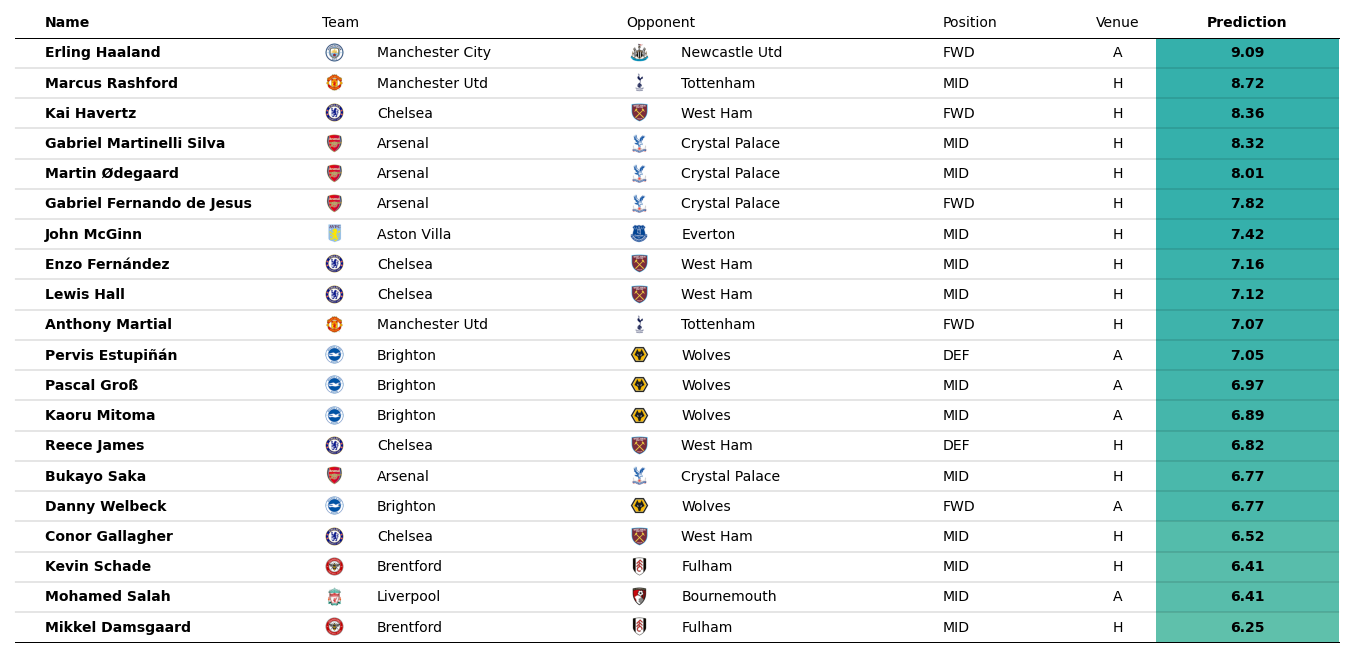

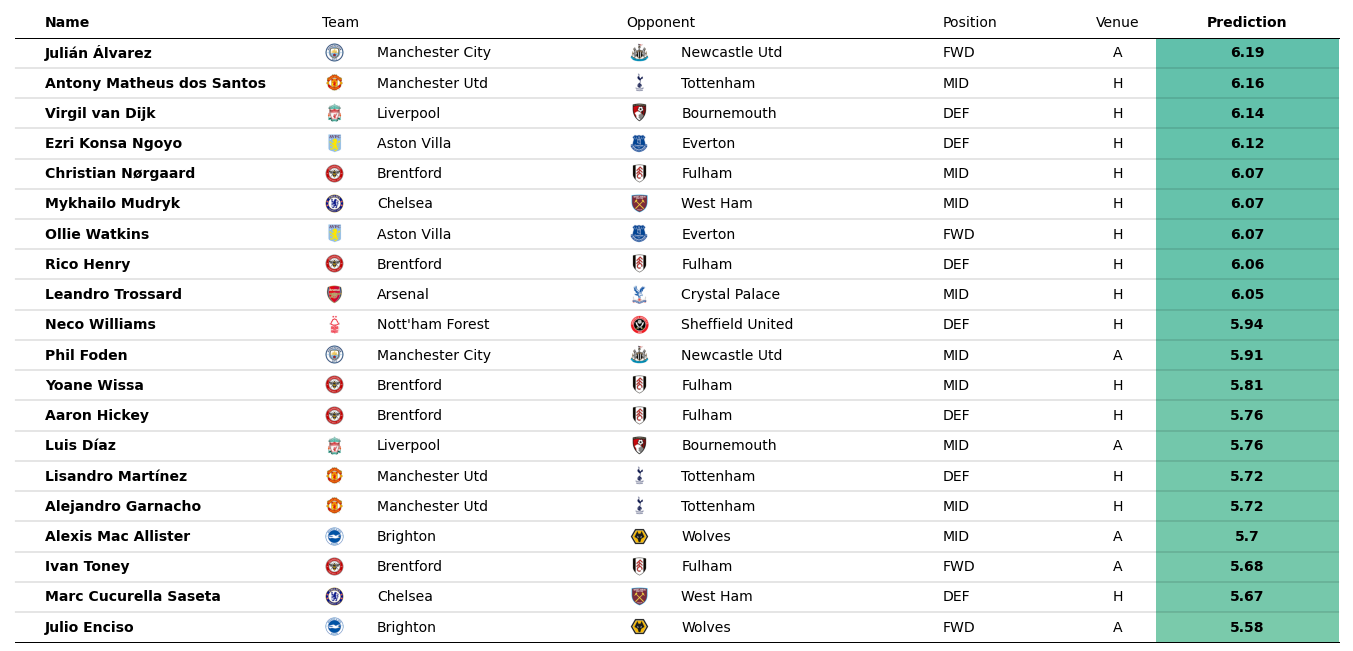

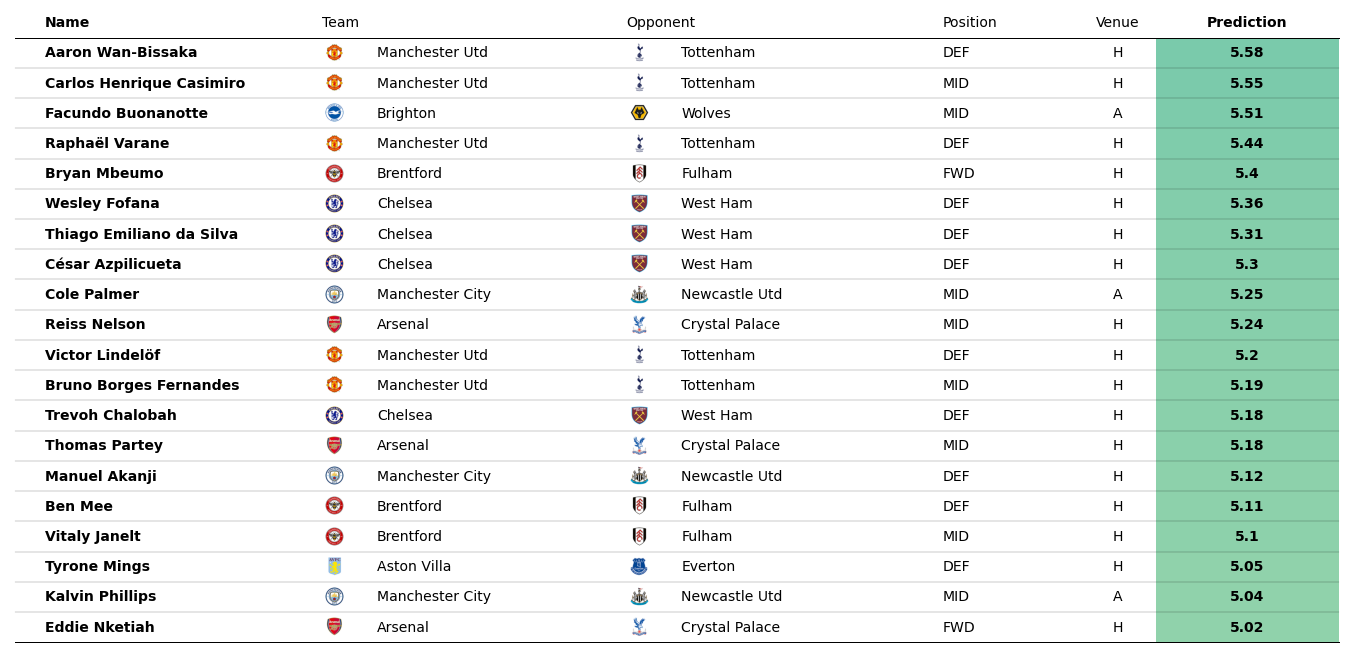

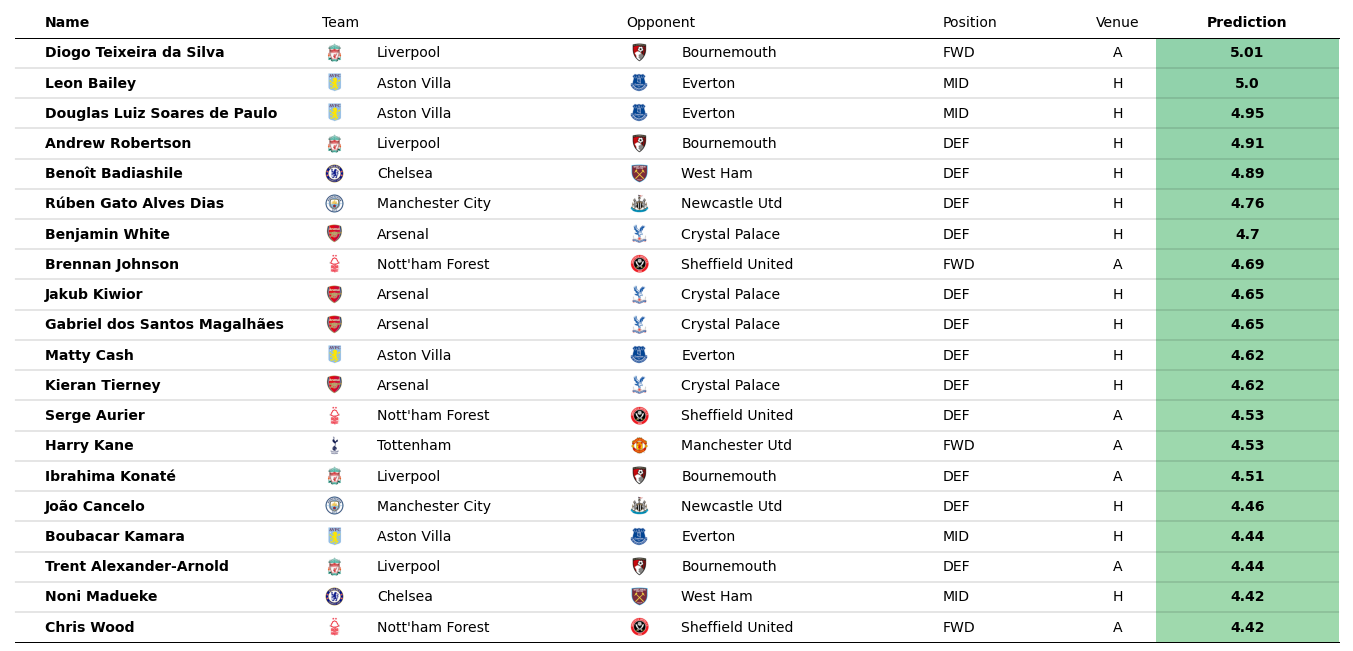

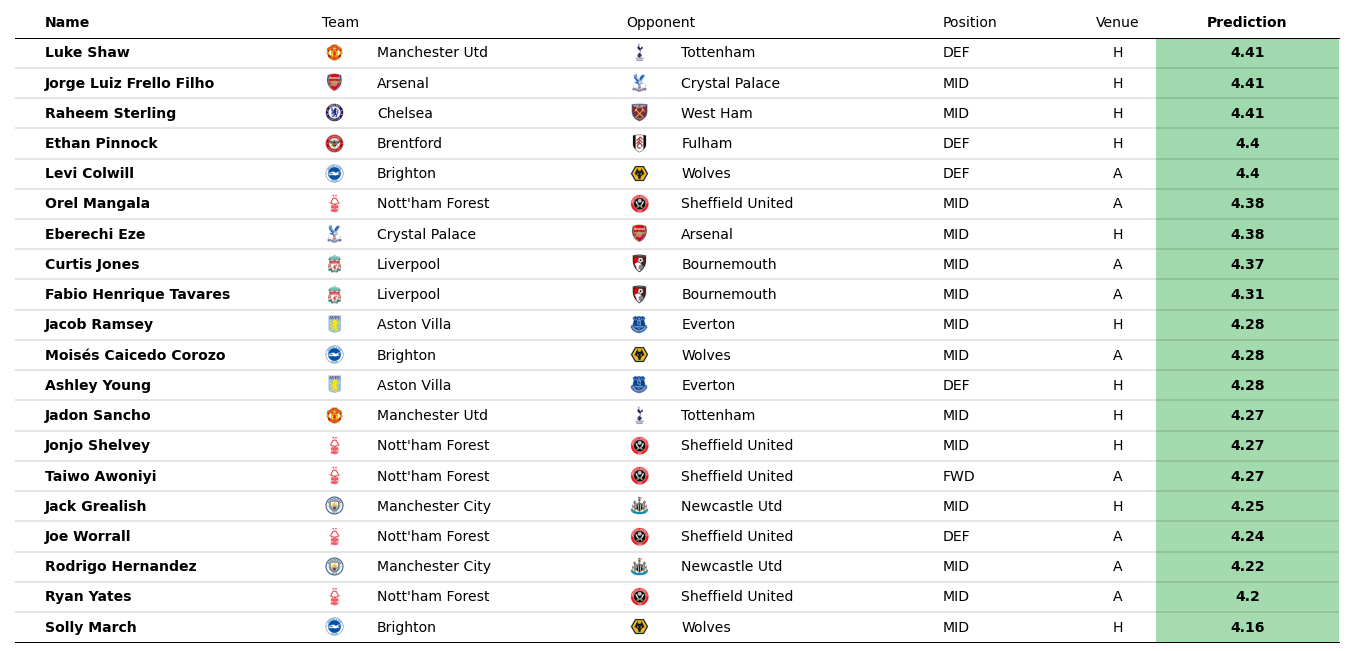

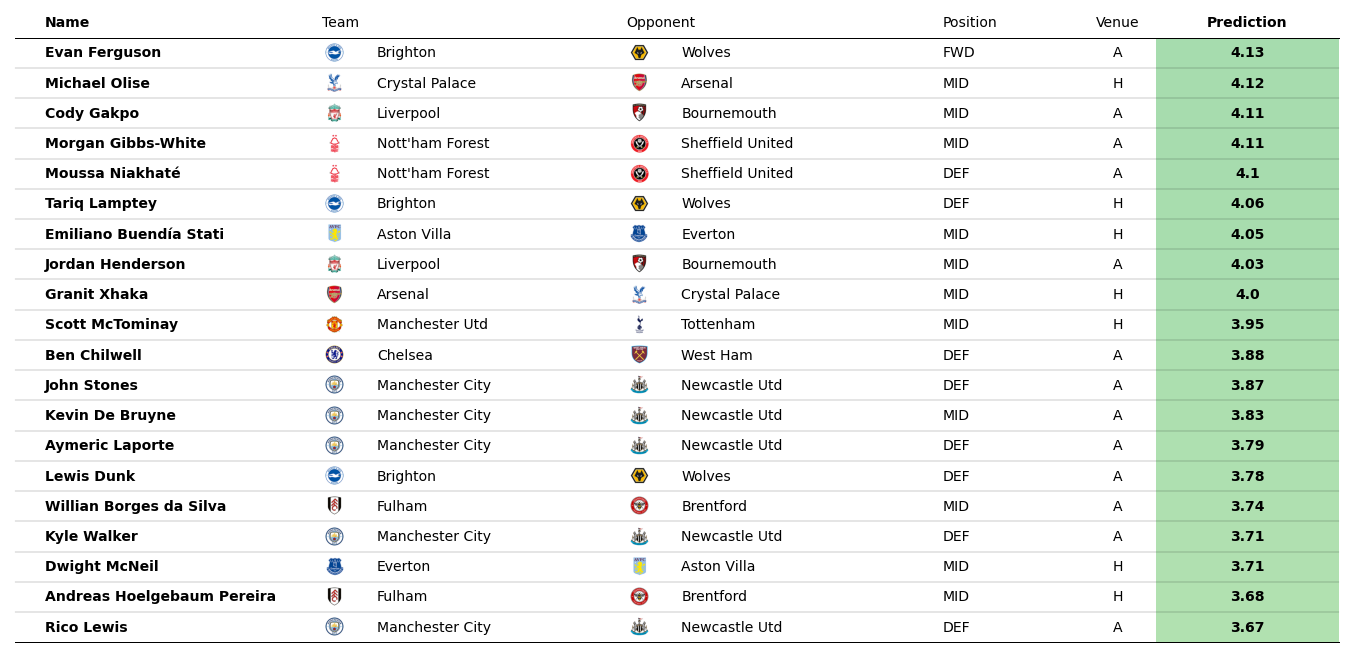

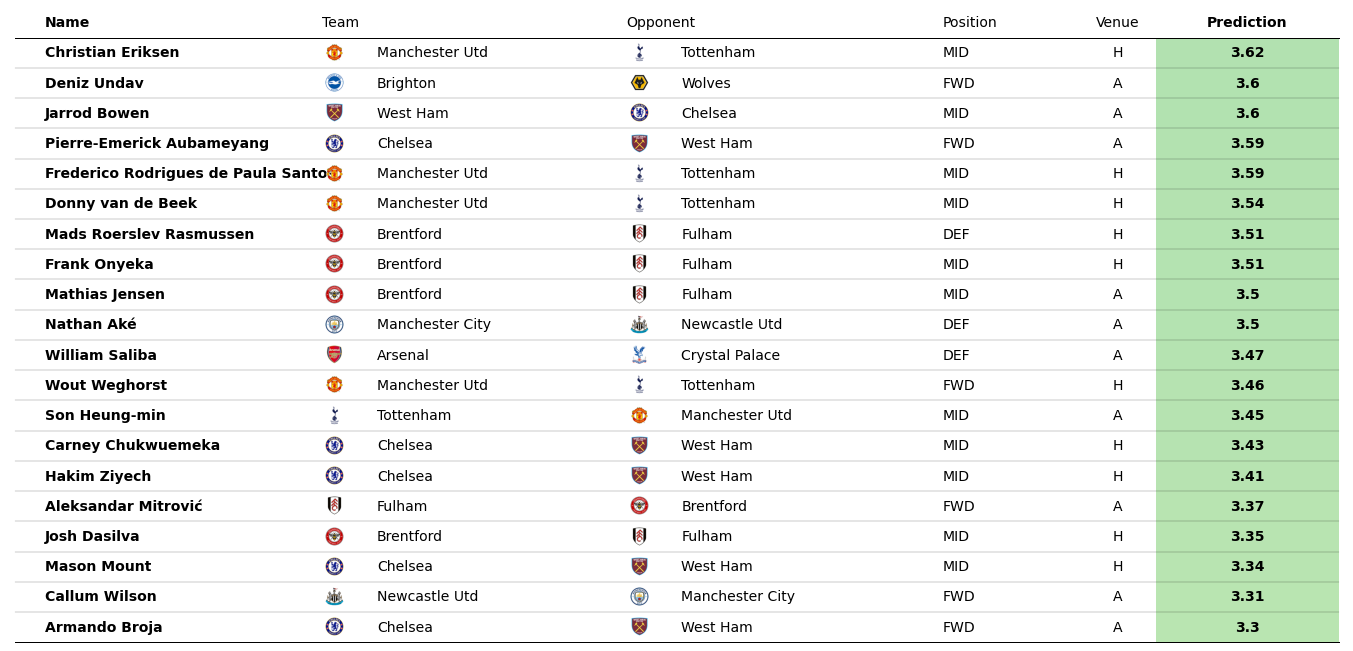

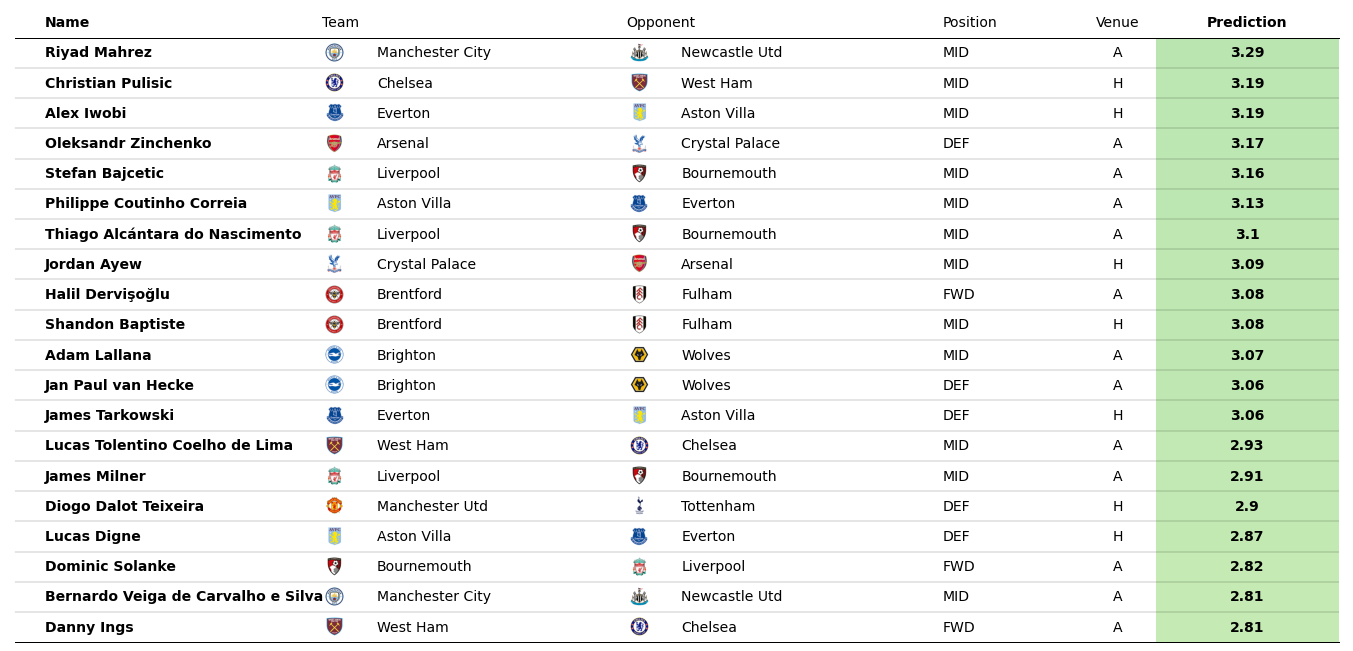

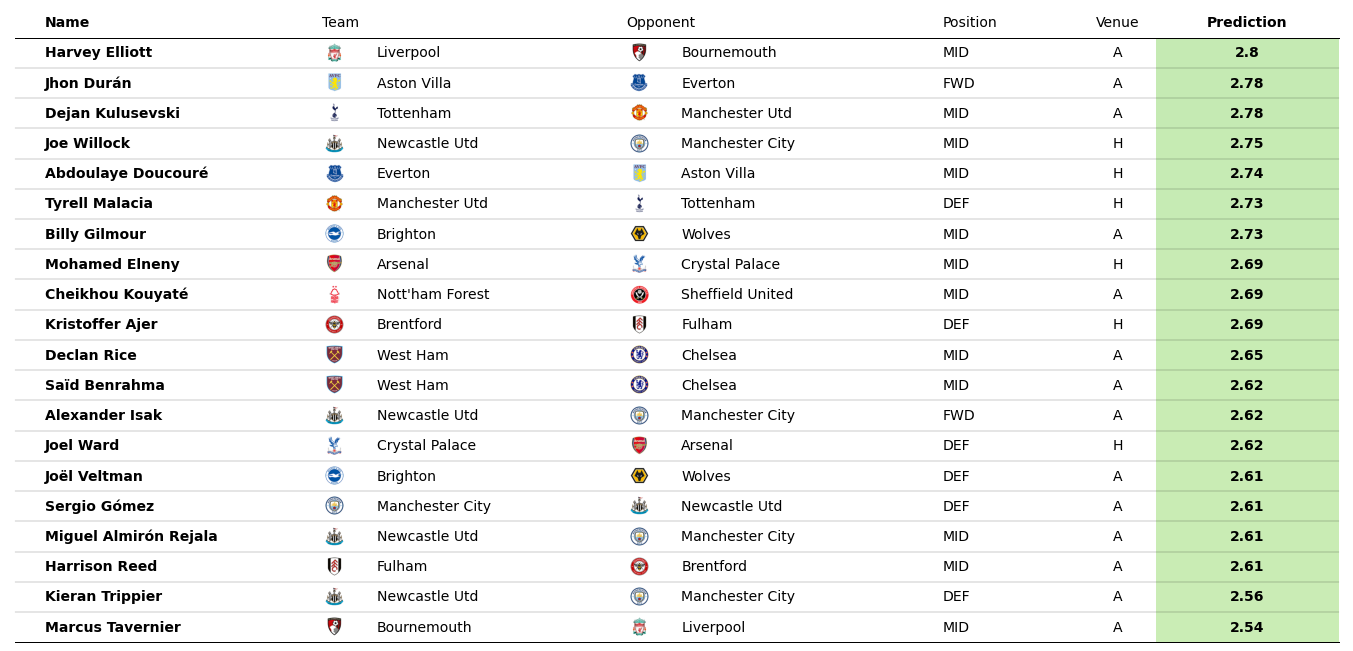

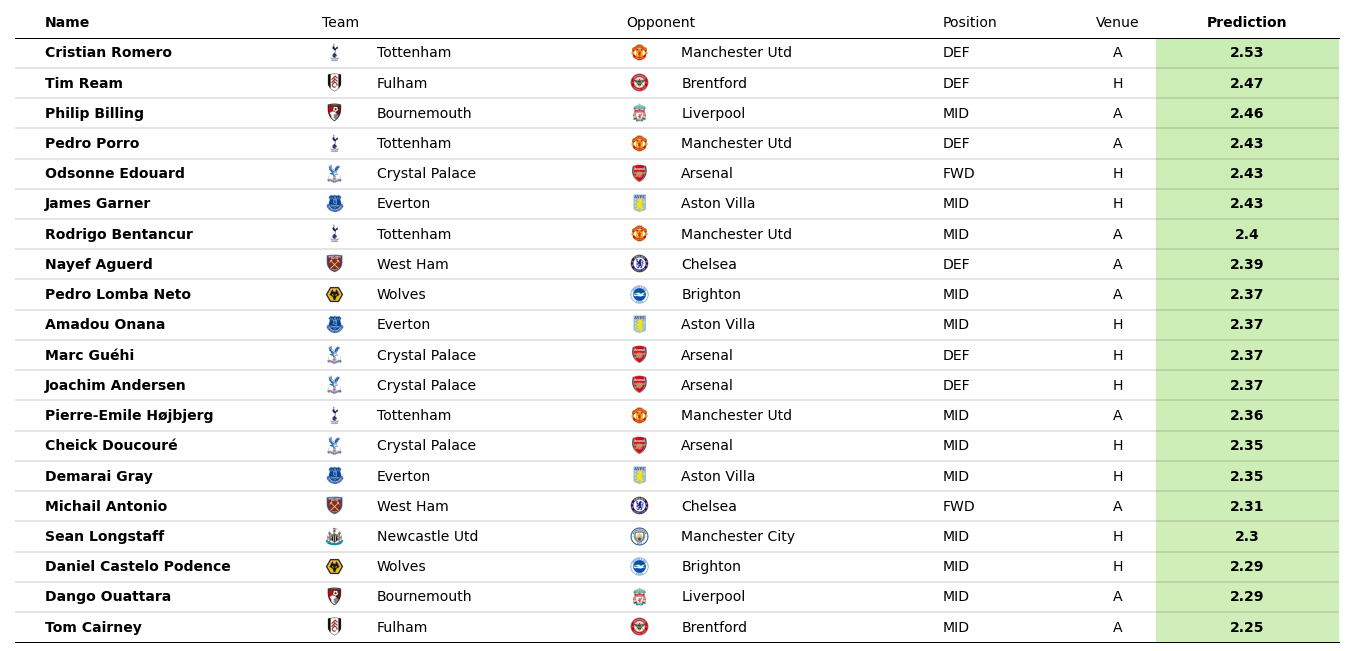

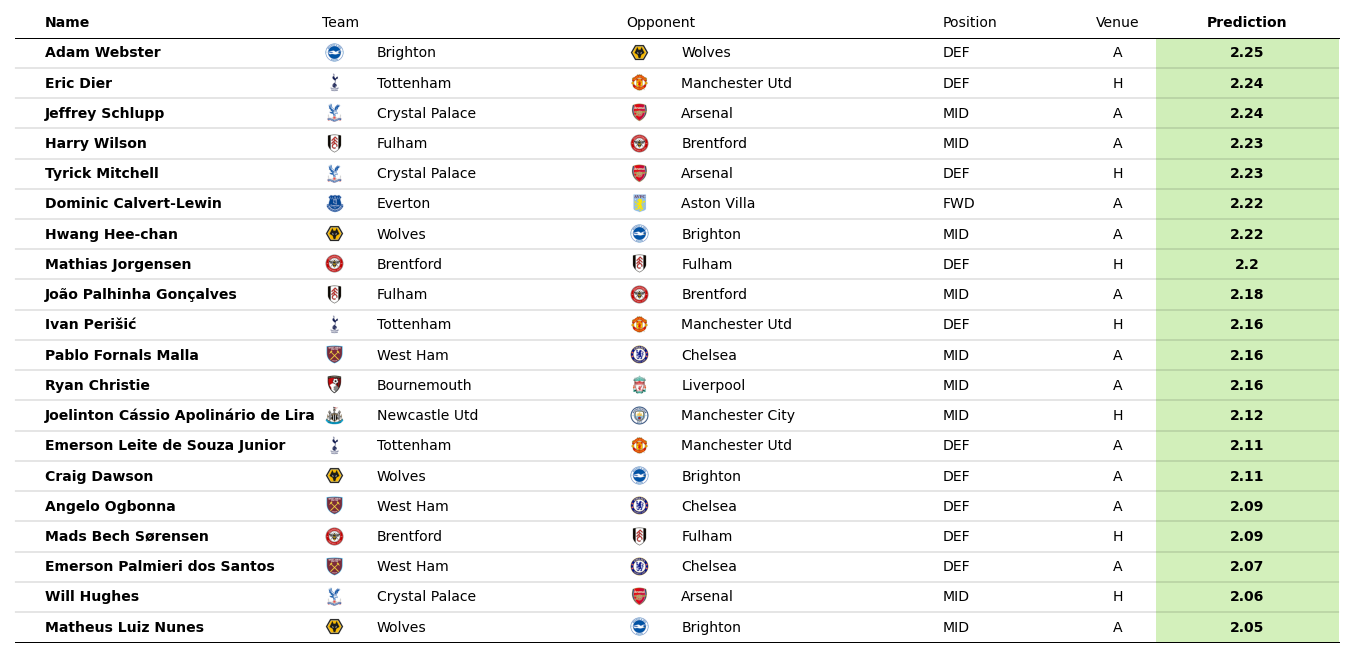

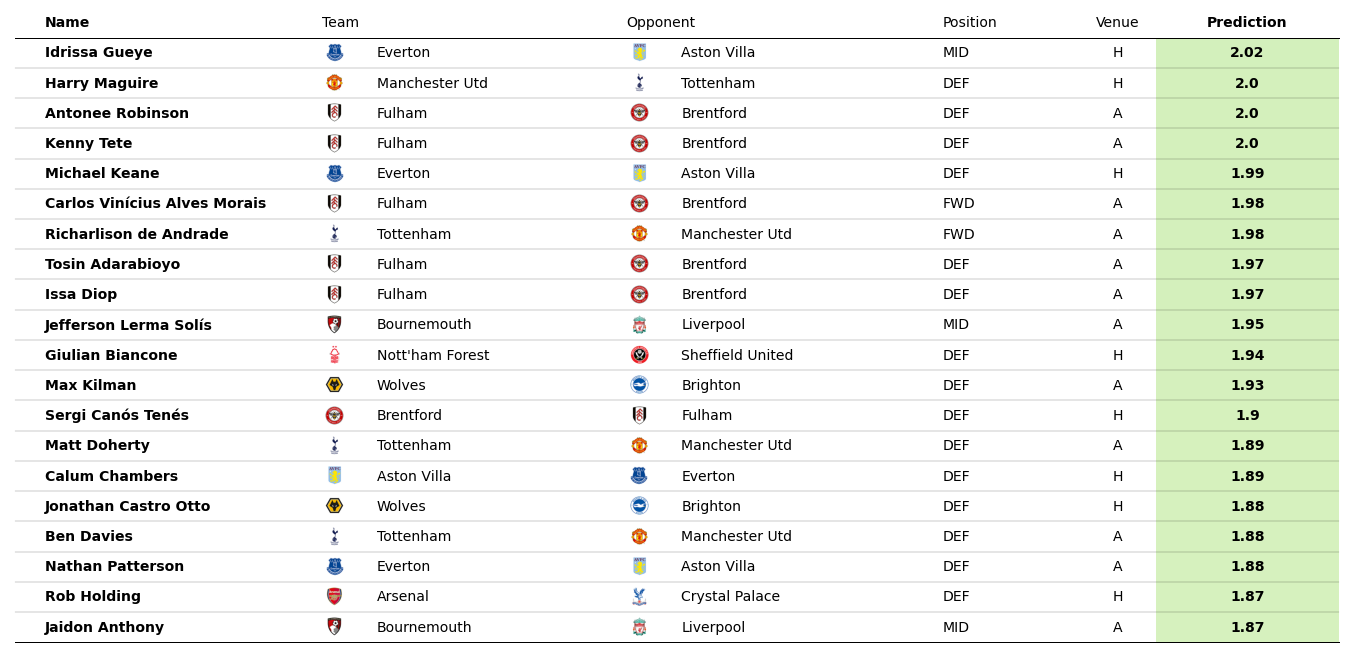

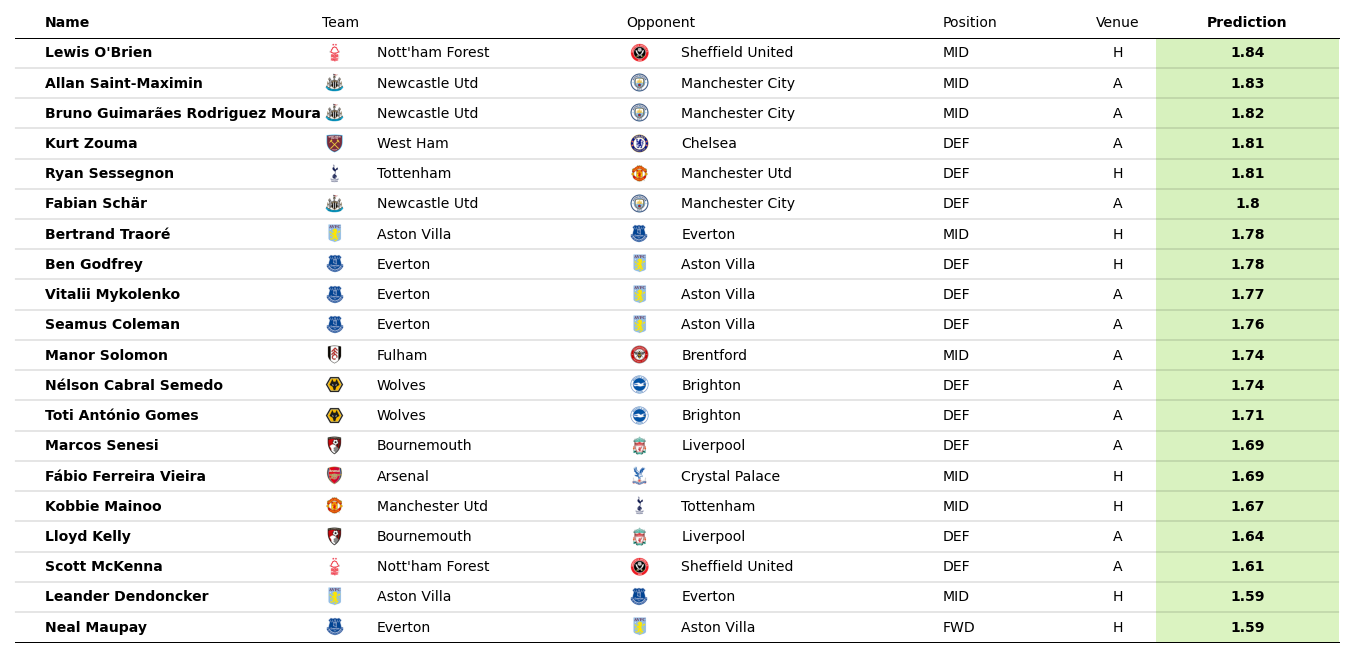

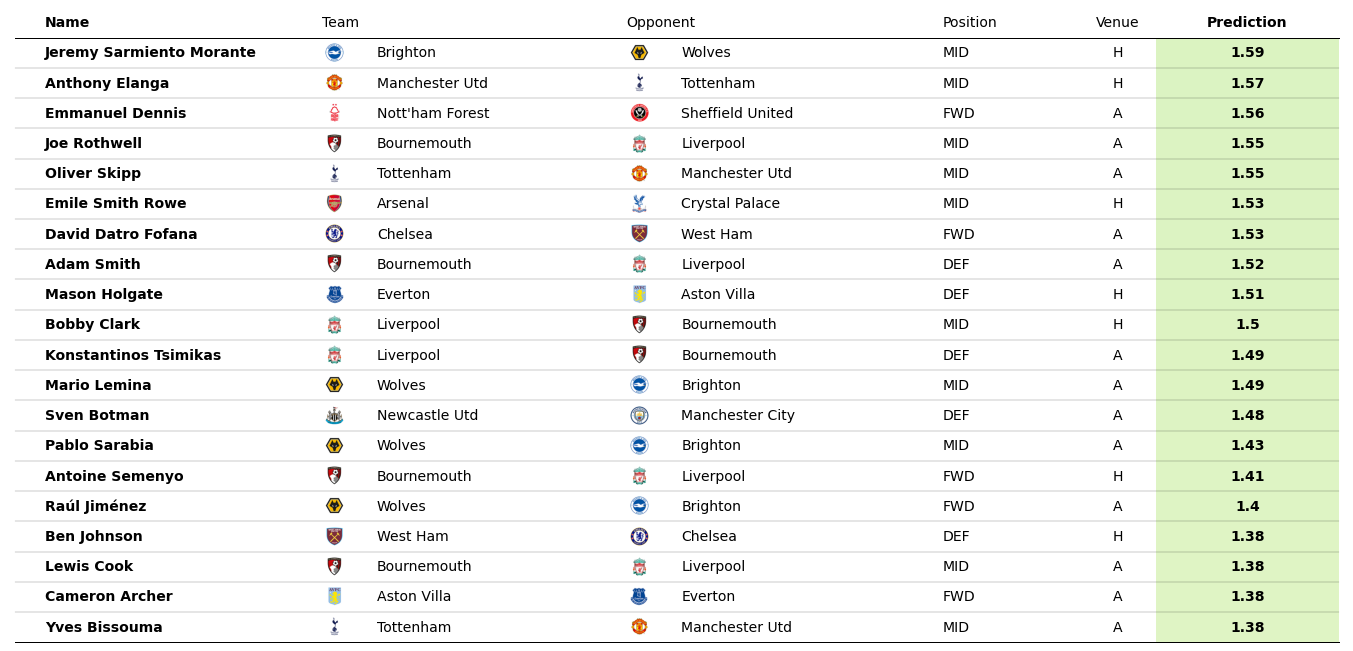

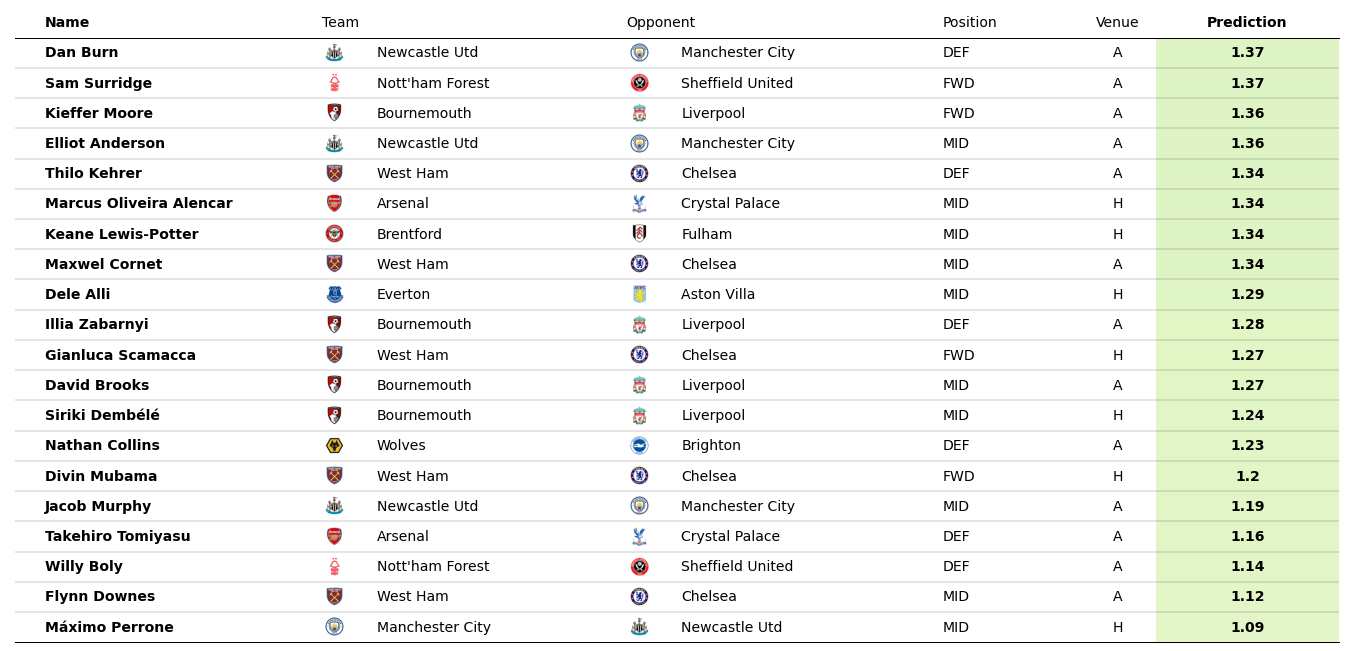

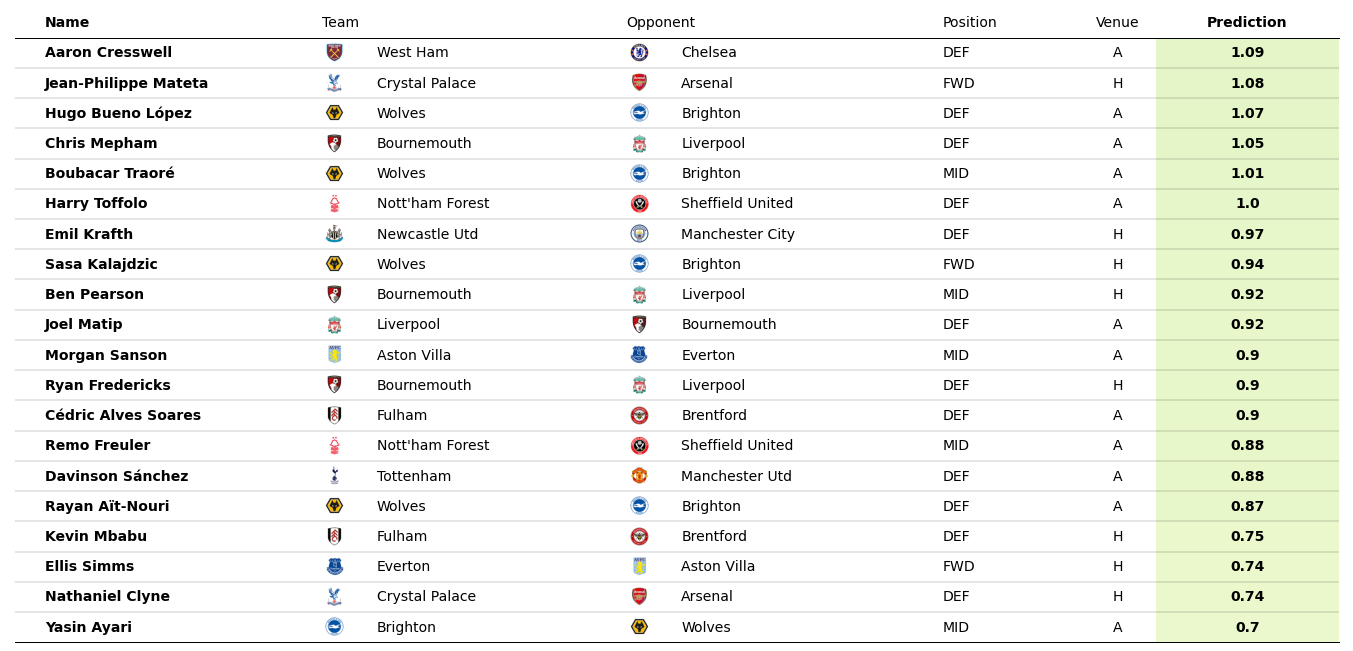

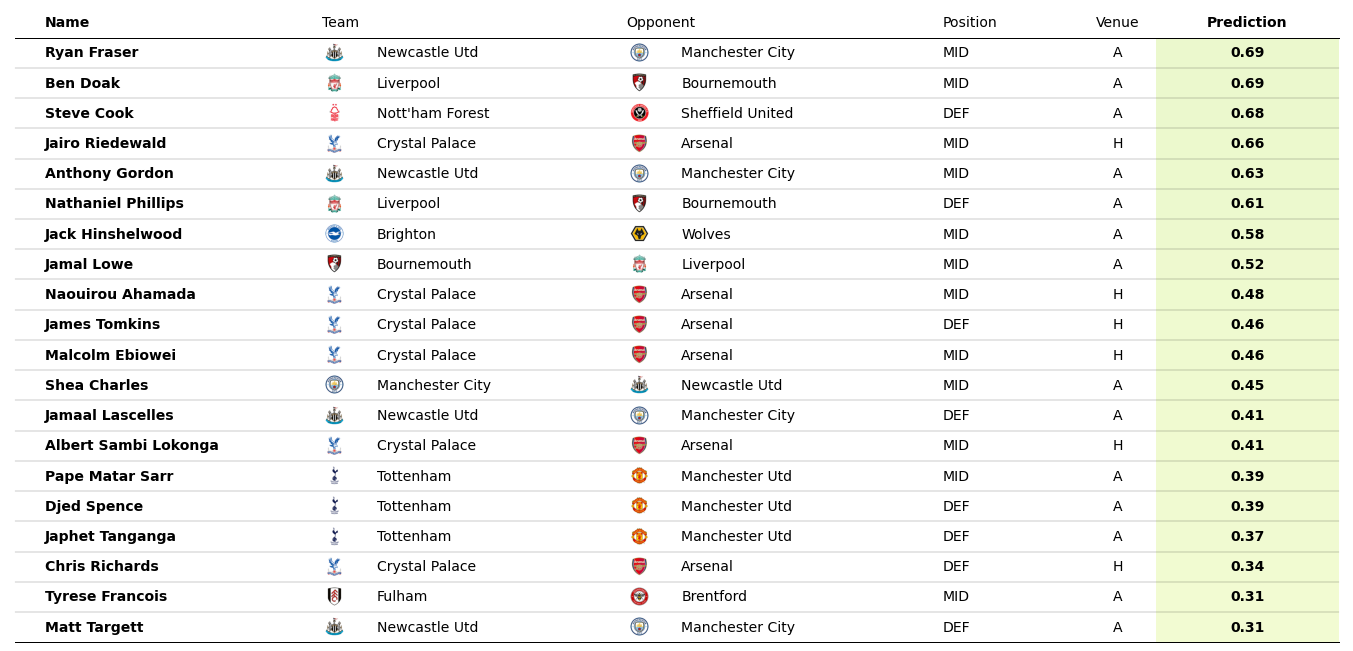

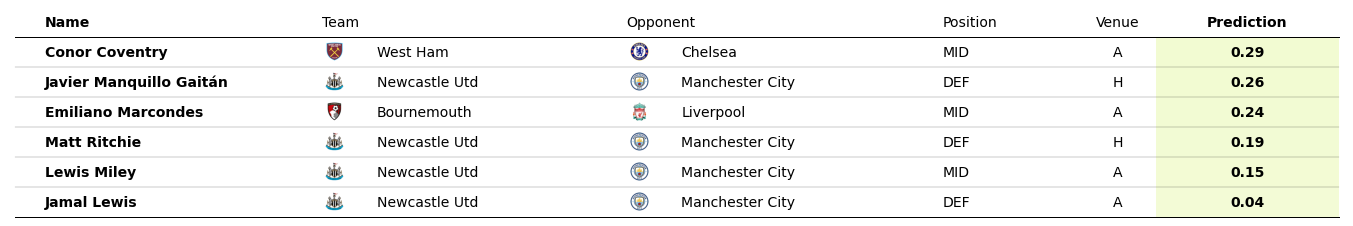

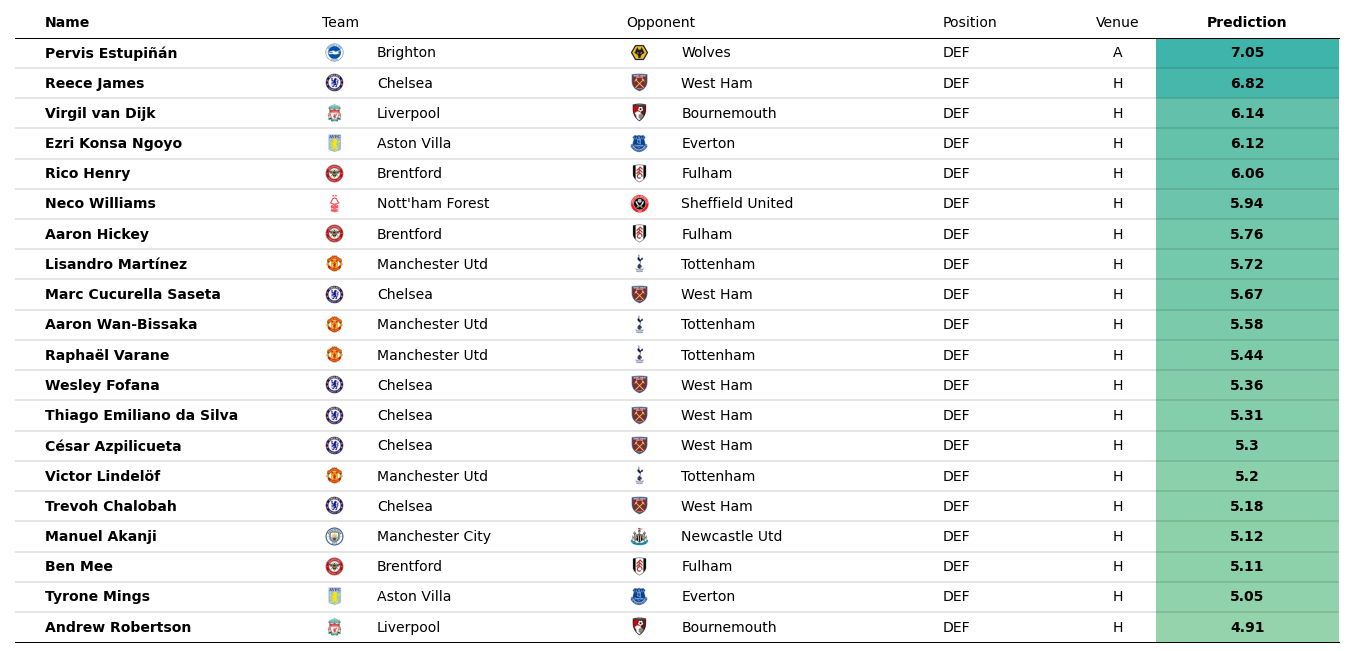

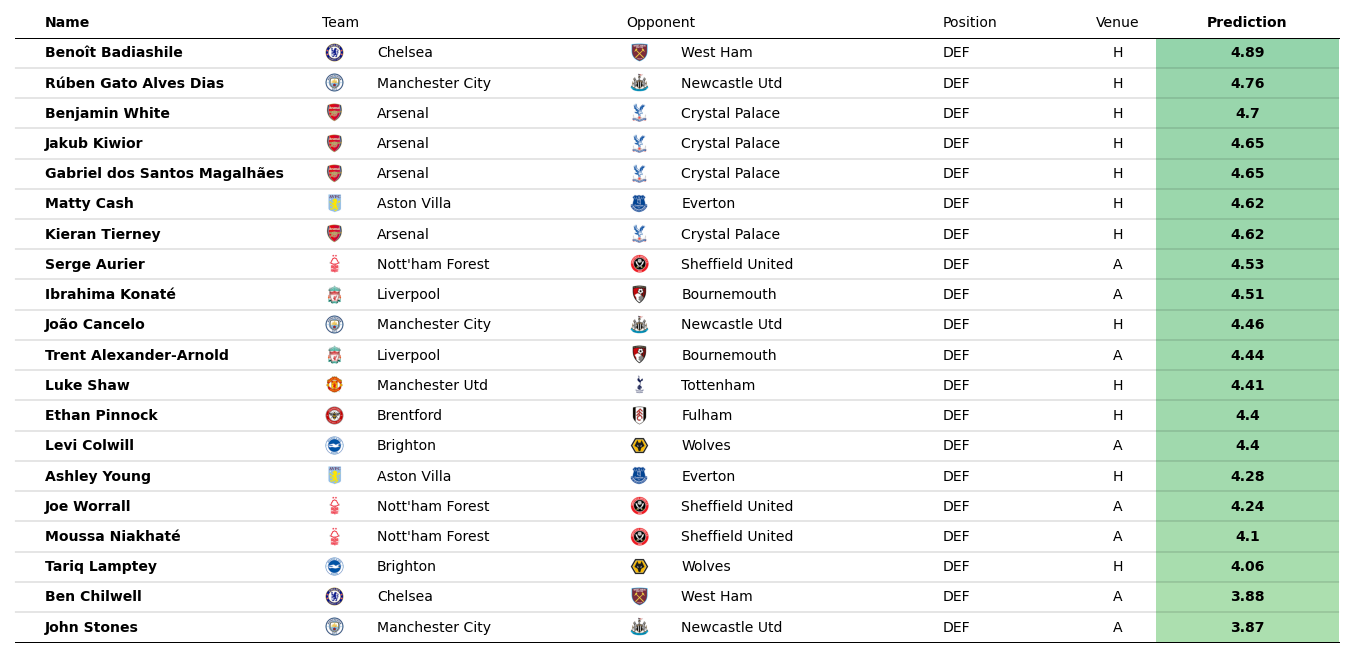

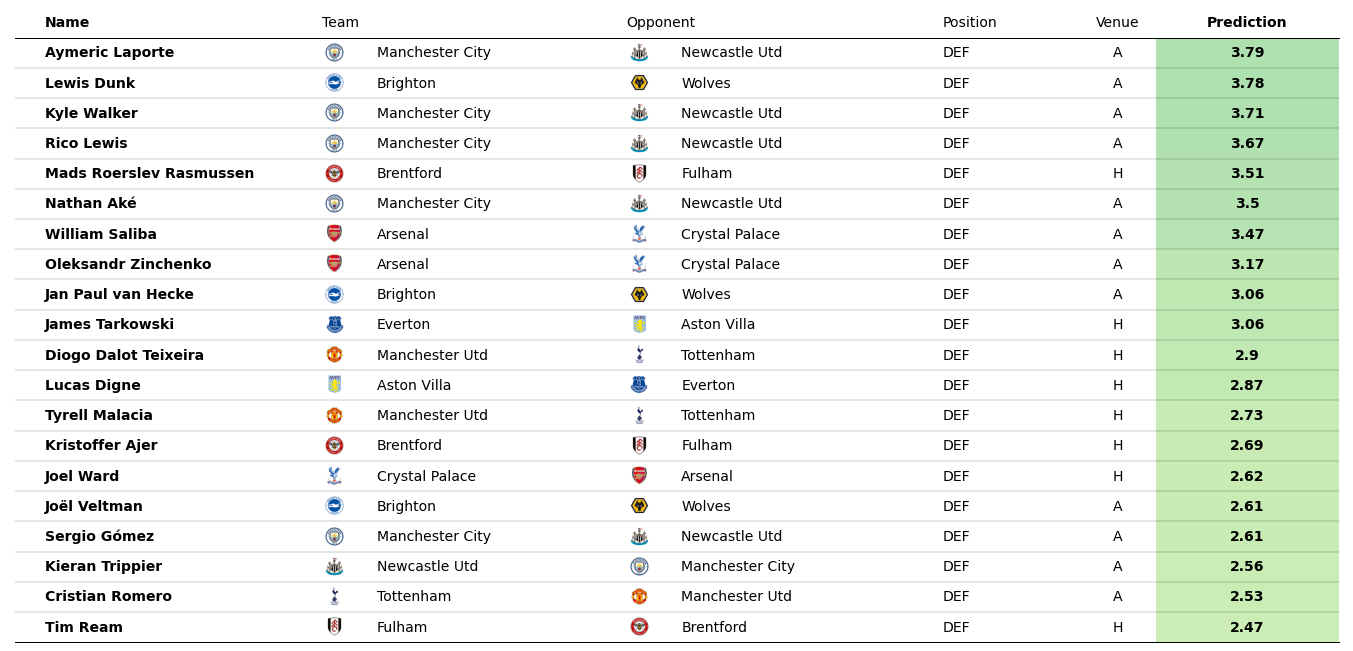

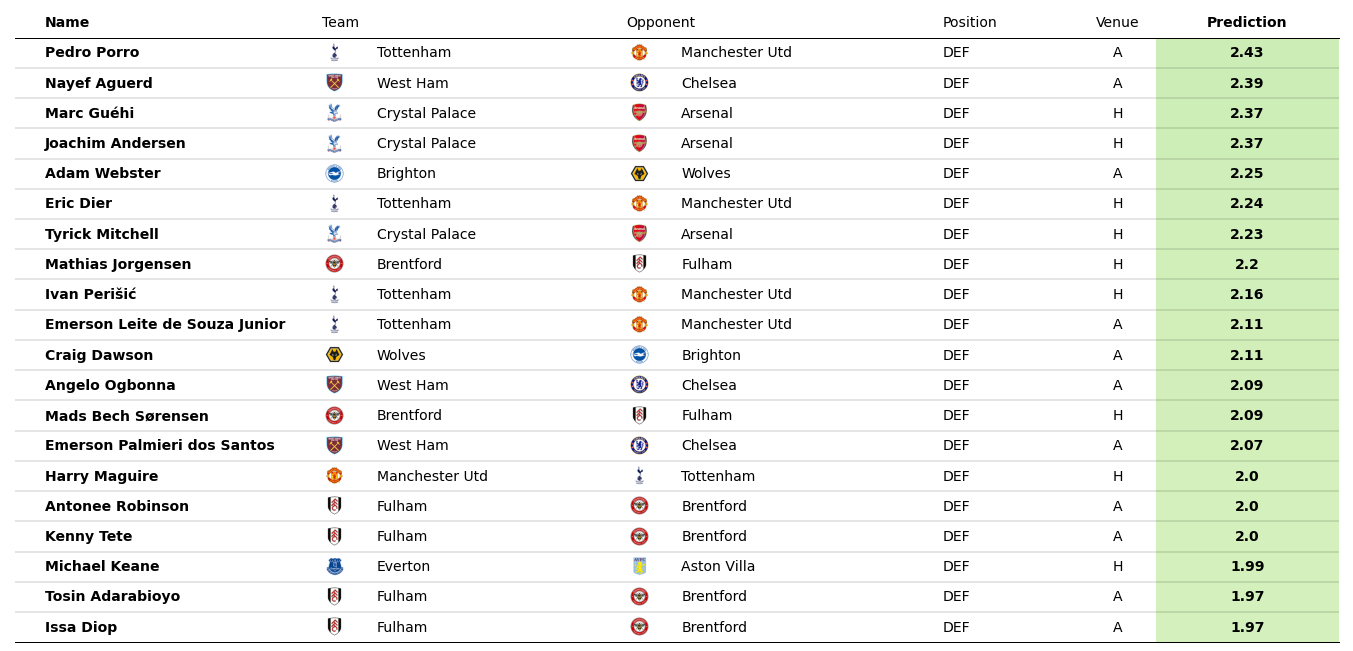

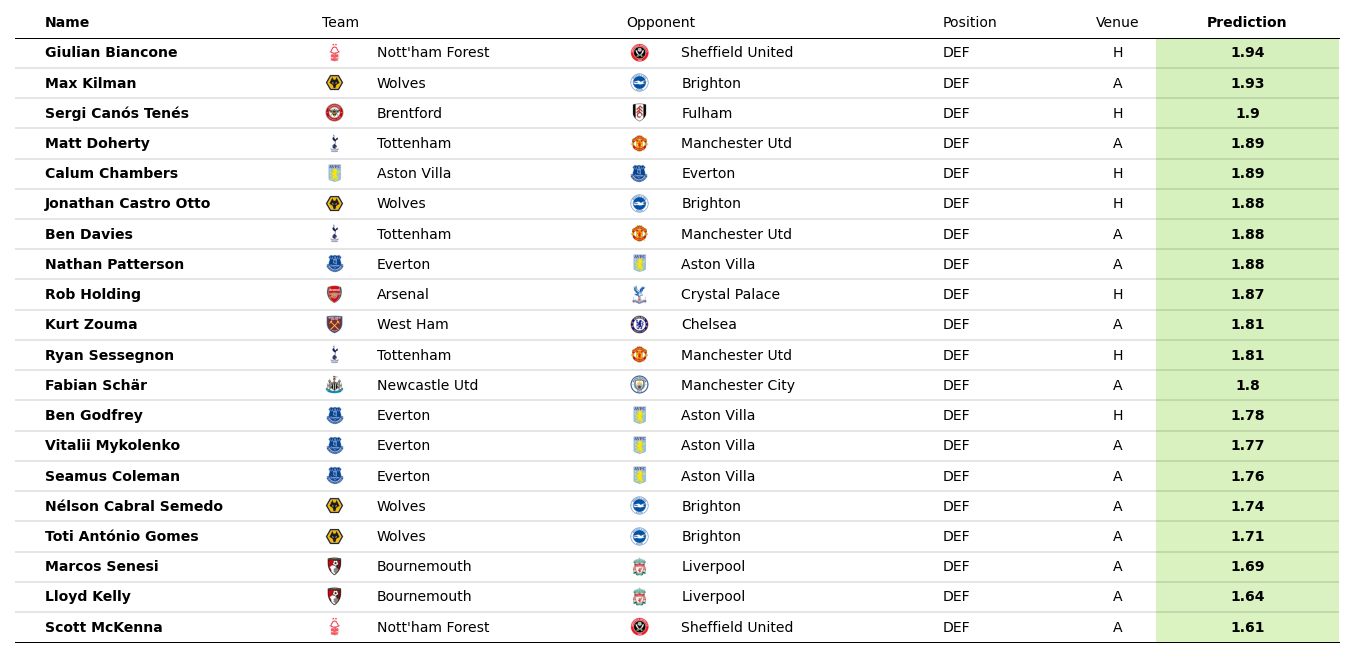

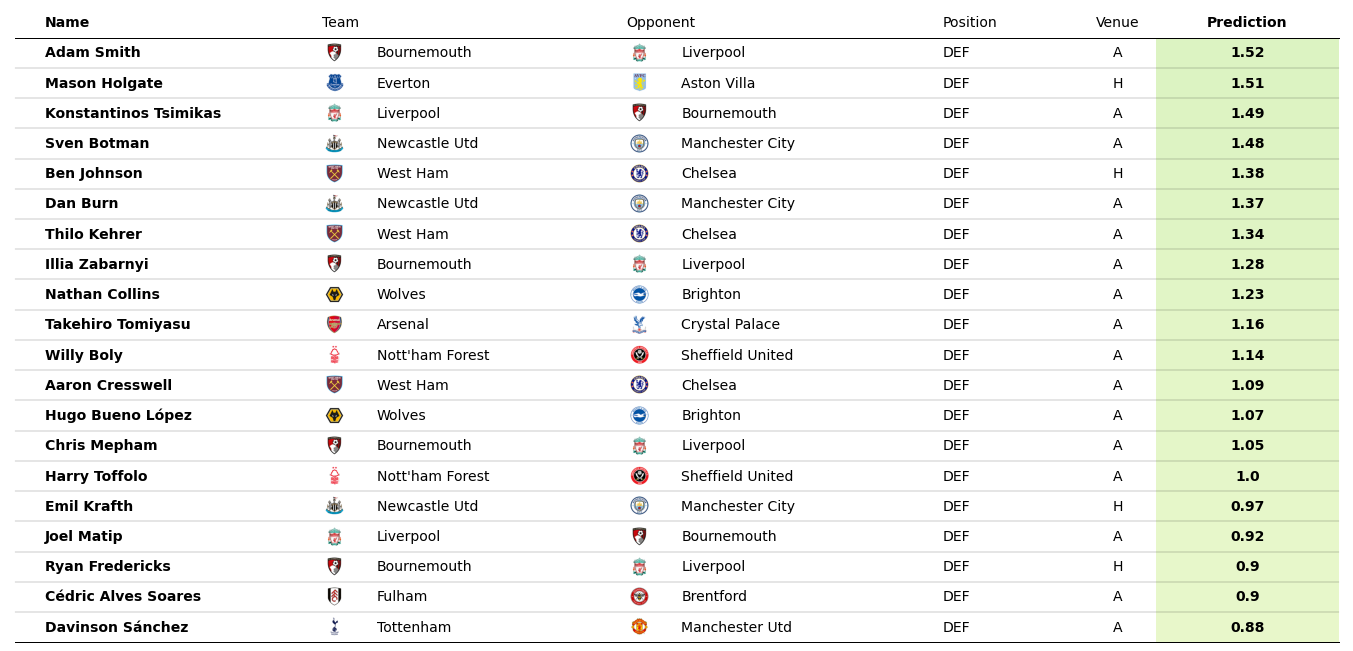

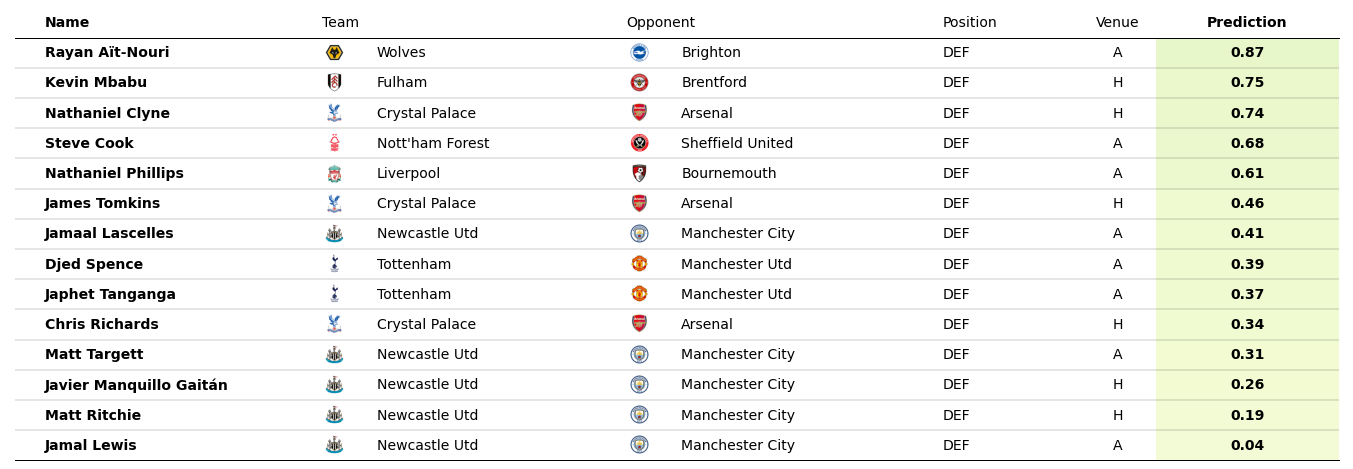

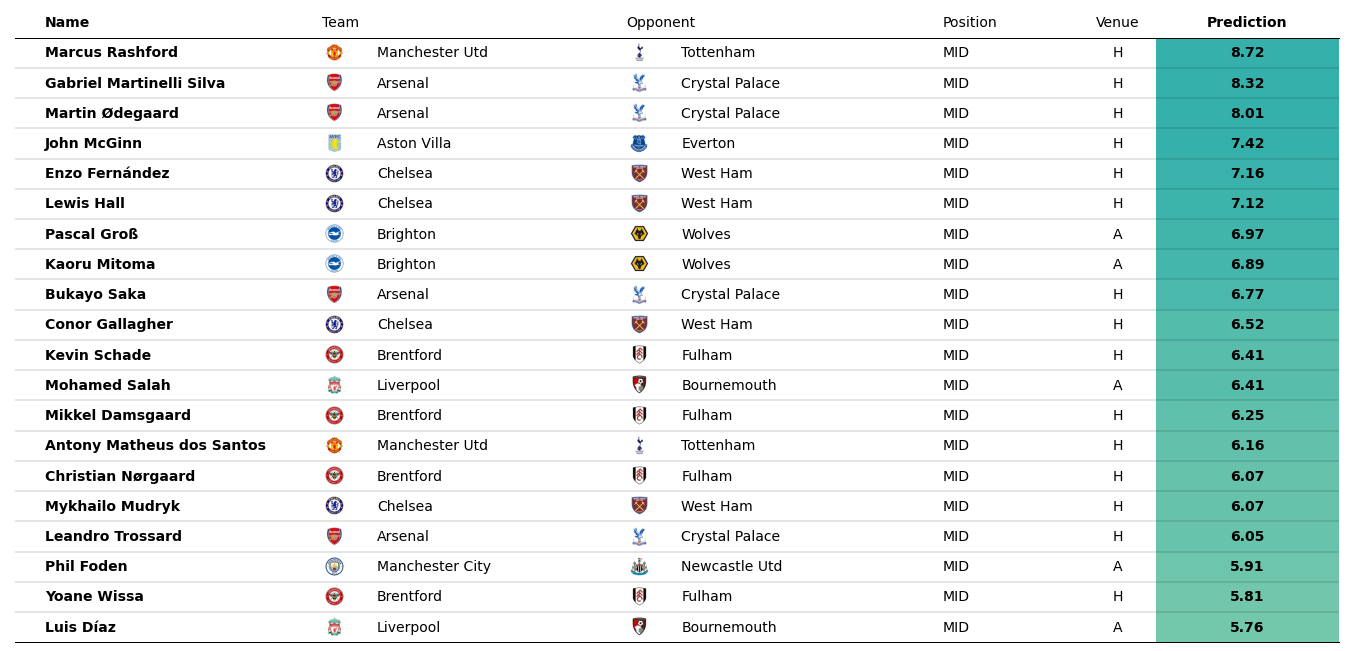

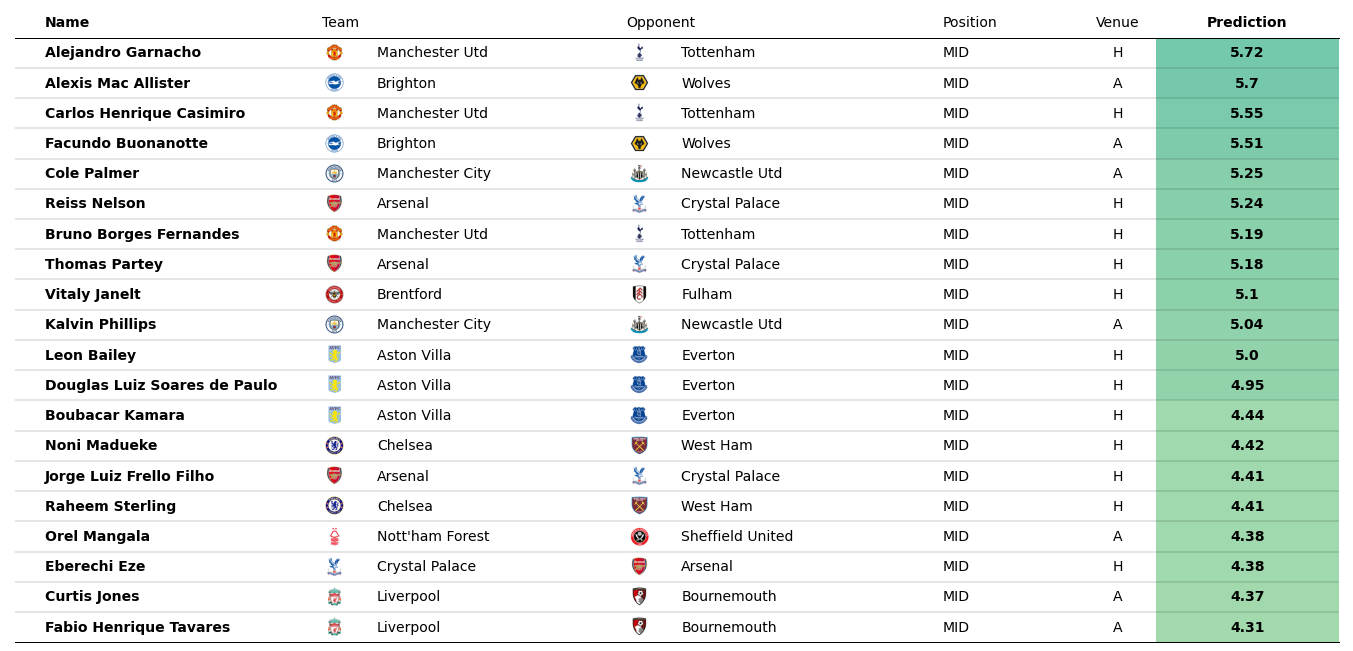

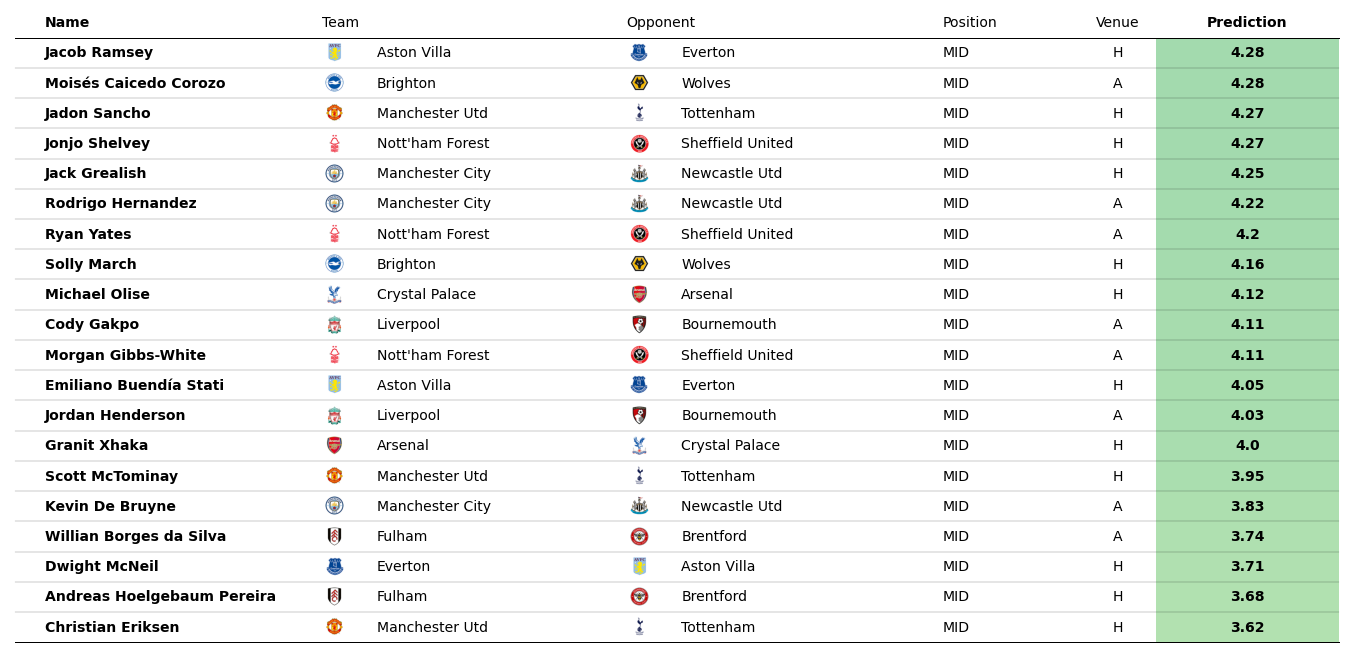

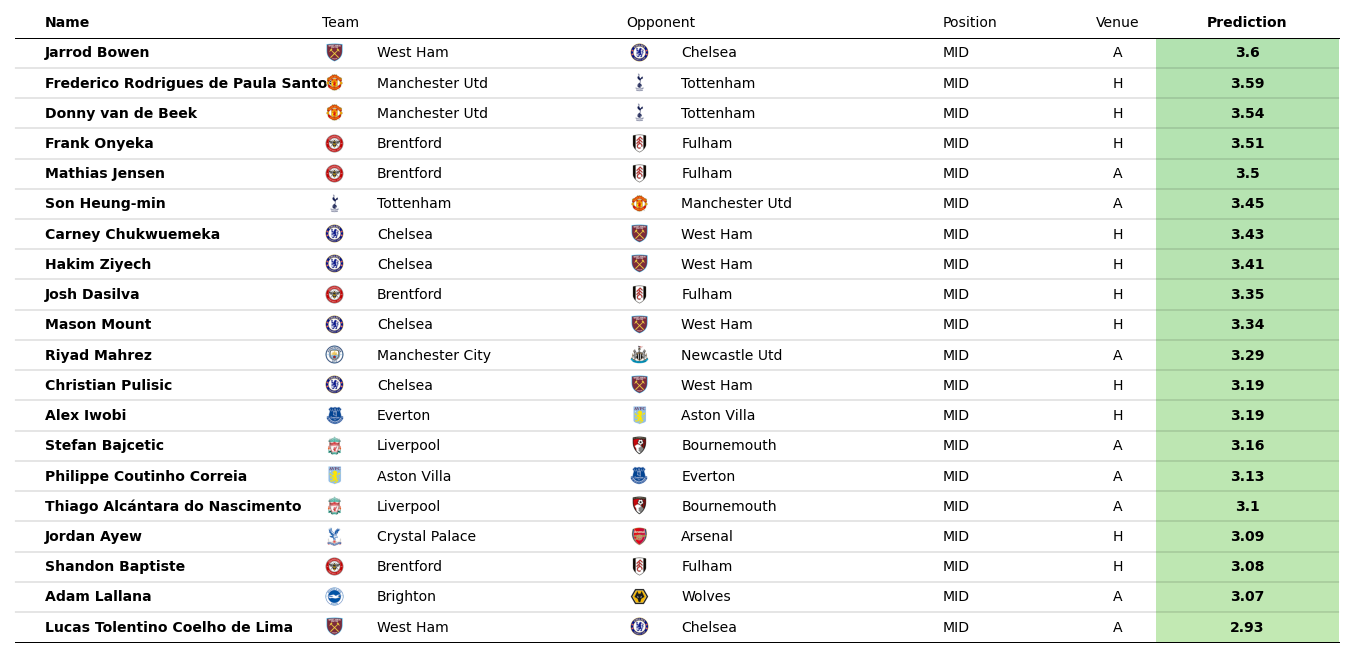

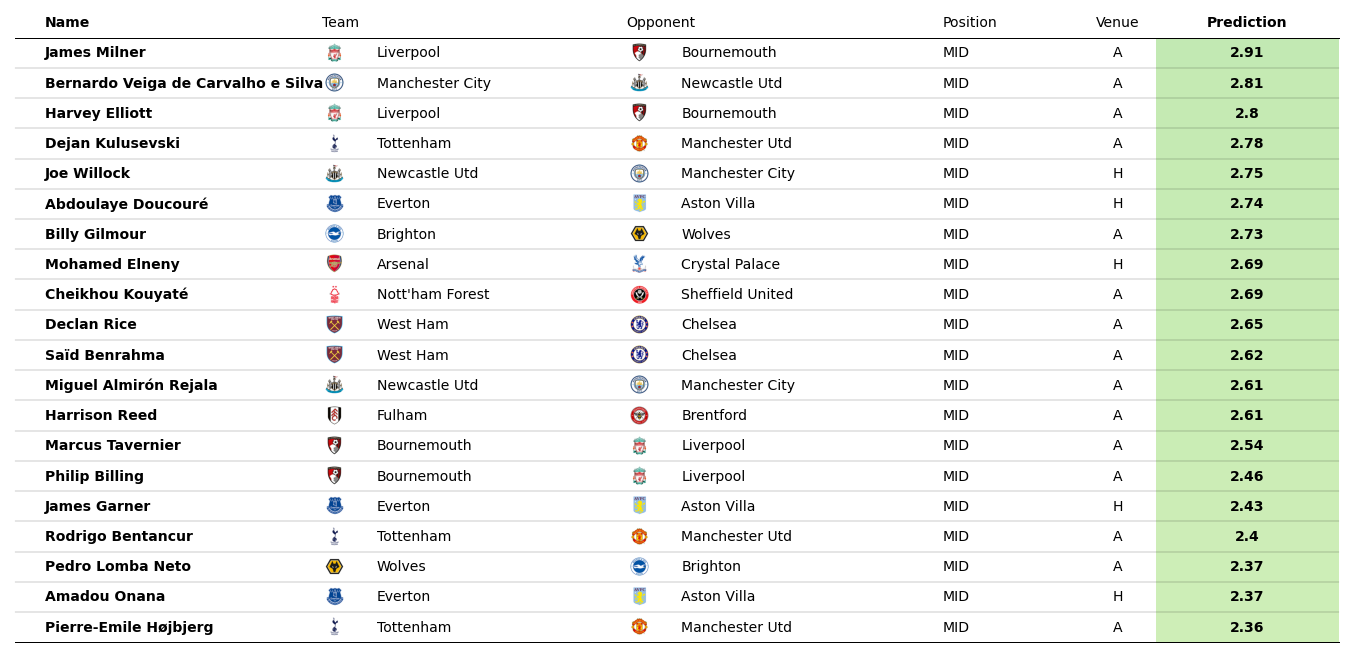

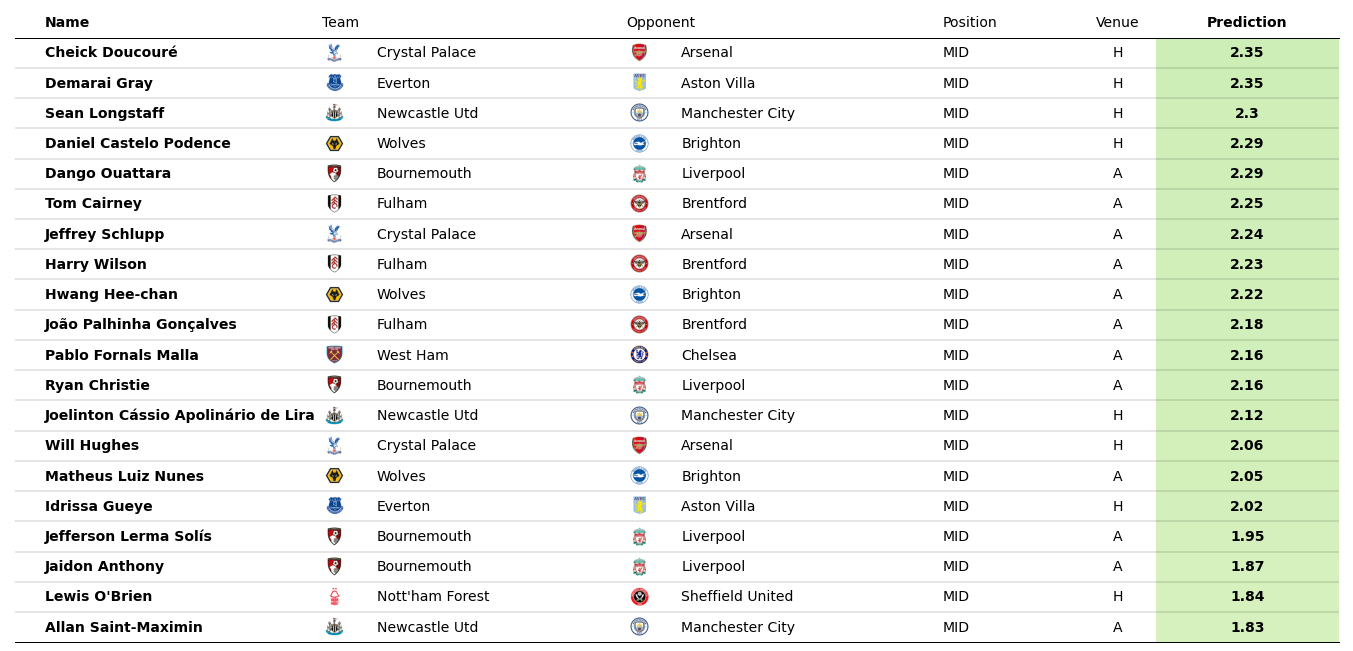

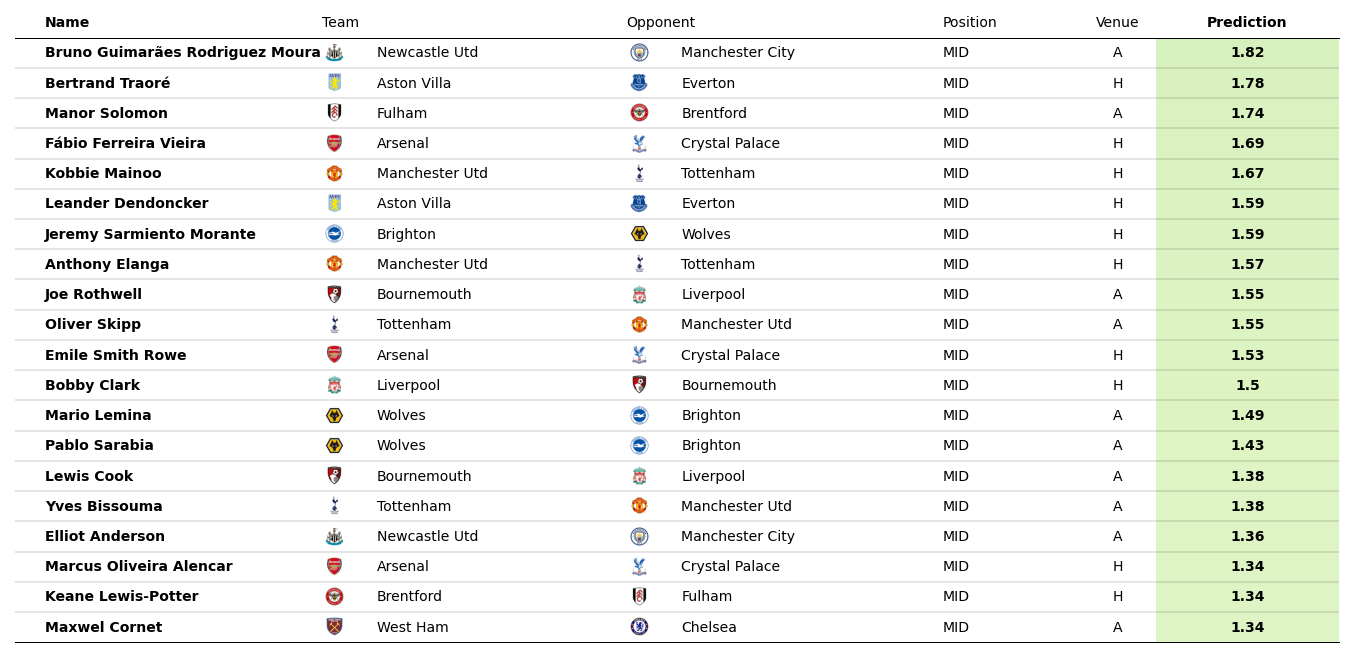

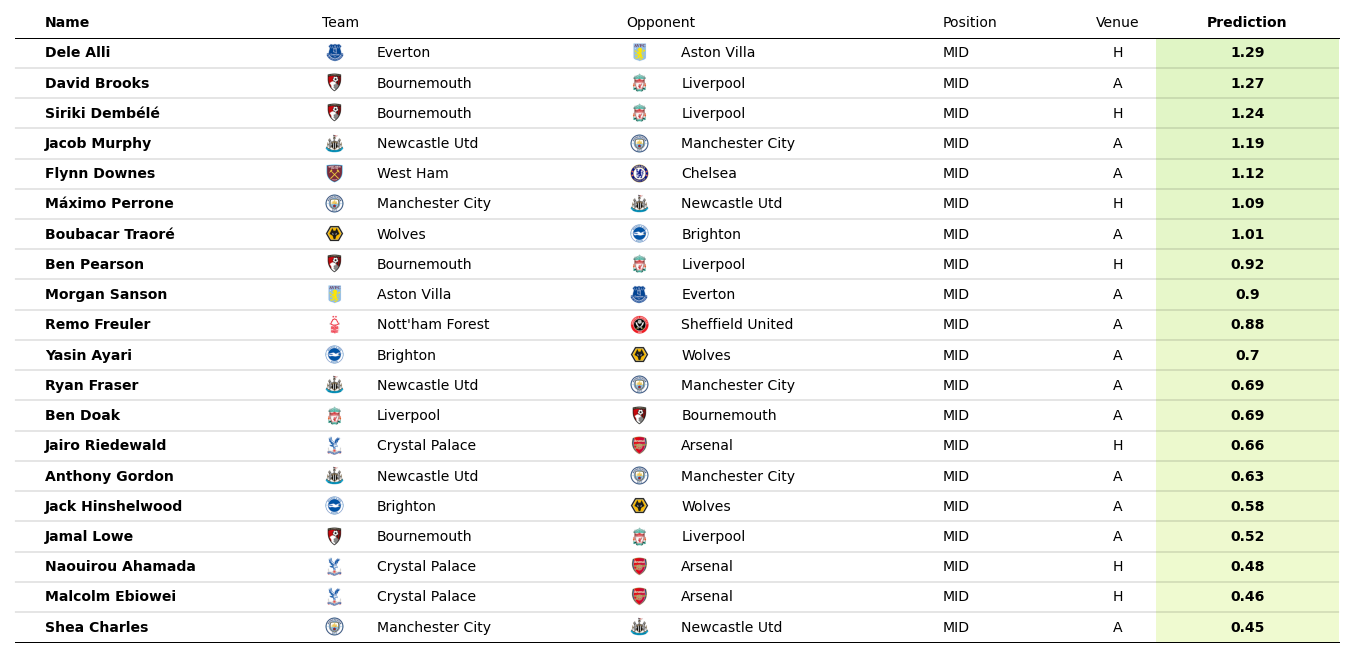

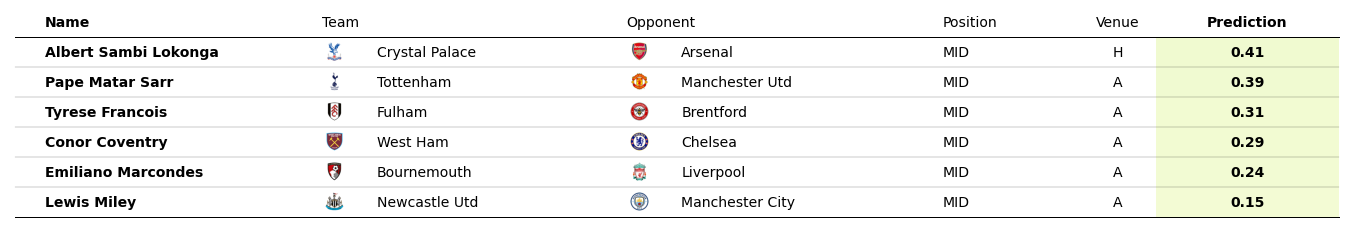

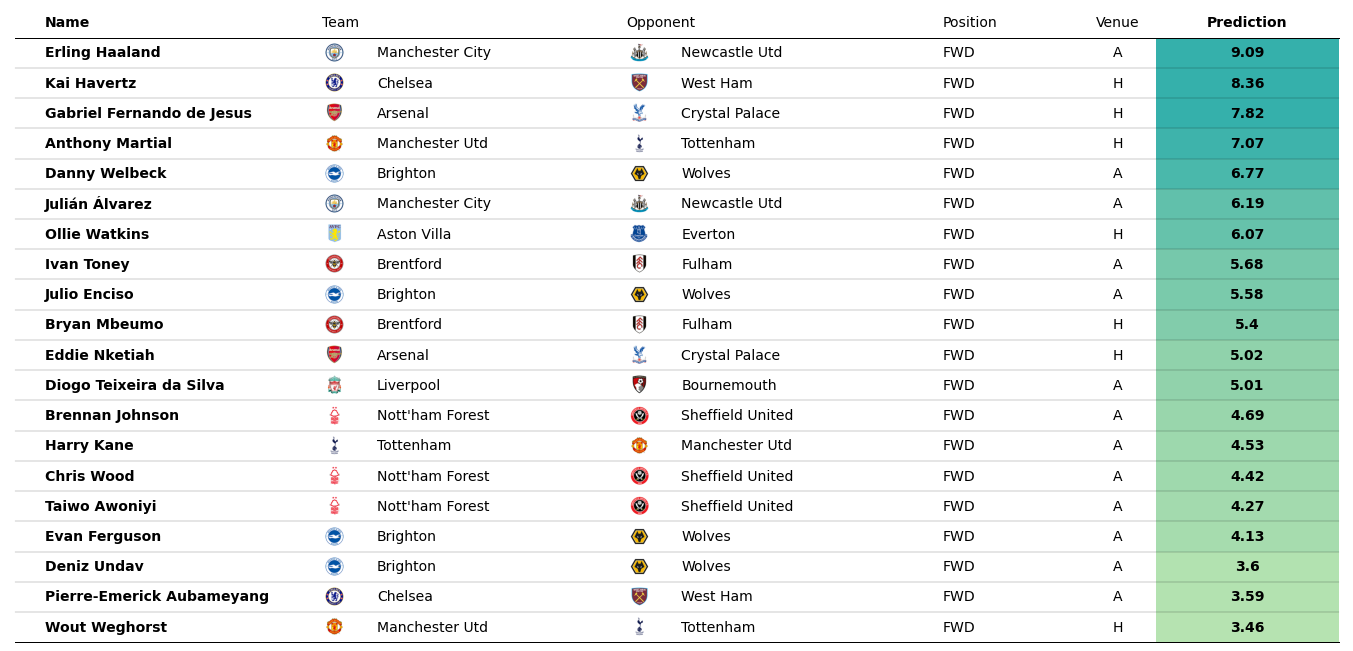

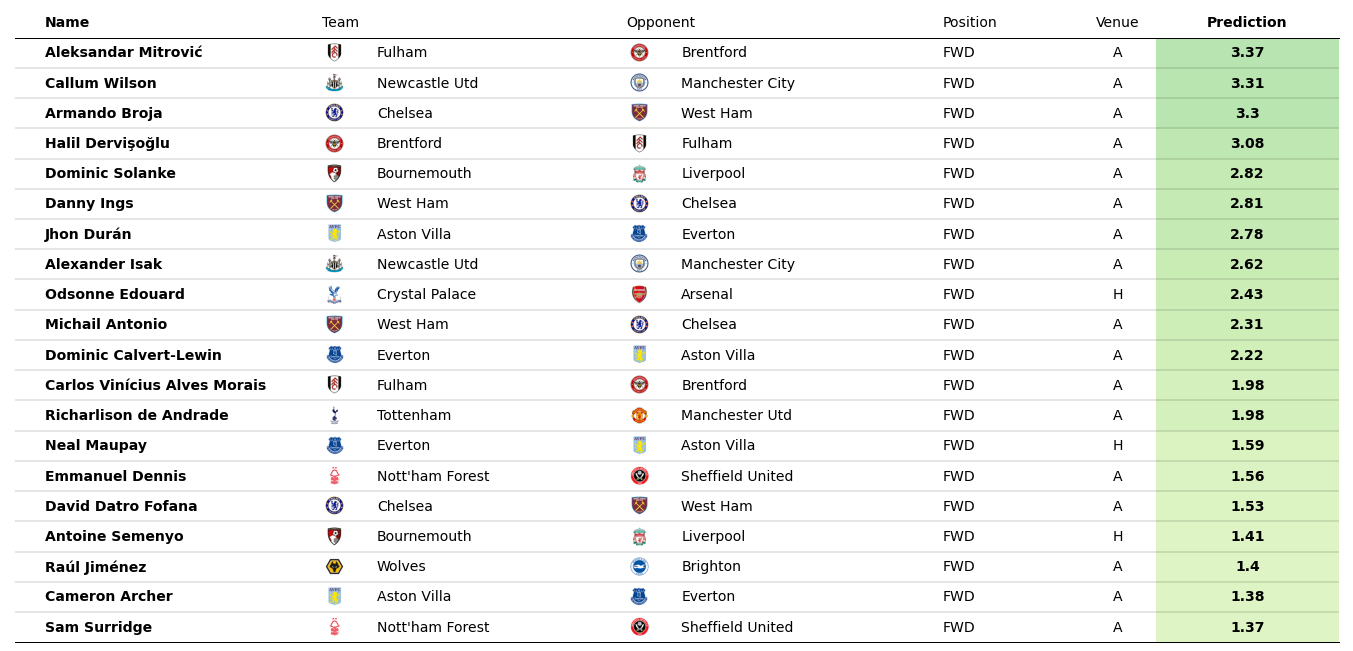

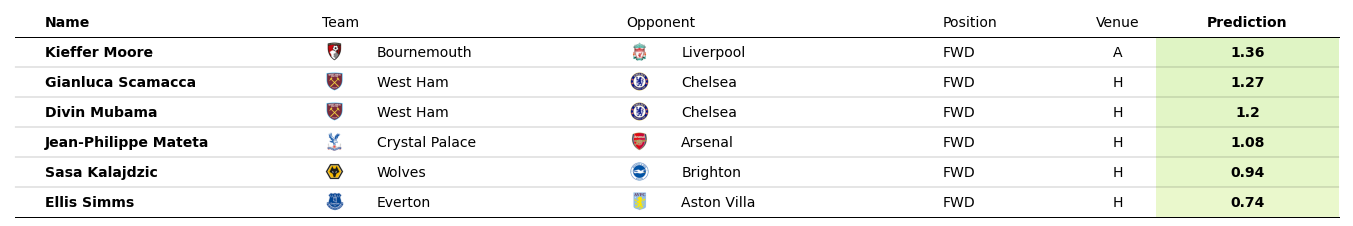

In [21]:
for j in range(0, 5):

    l = 0
    p = PLAYERS_PER_PAGE
    i = 1
    dataframe = dfs[j]

    while l < dataframe.shape[0]:
        PLAYERS_ON_PAGE = min(PLAYERS_PER_PAGE, dataframe.shape[0] - l)

        fig, ax = plt.subplots(figsize=(24, ( (PLAYERS_ON_PAGE + 1) / 43) * 24))

        table = Table(
            dataframe[l:p],
            column_definitions=col_defs,
            row_dividers=True,
            footer_divider=True,
            ax=ax,
            textprops={"fontsize": 14},
            col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
            column_border_kw={"linewidth": 1, "linestyle": "-"},
        )

        # saving plot
        fig.savefig(BASE_OUT_PATH + f"_{positions[j]}_{i}.png", facecolor=ax.get_facecolor(), dpi=200)

        l += PLAYERS_PER_PAGE
        p += PLAYERS_PER_PAGE
        i += 1